# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования** - выполнить следующие задачи:
1. Построить графики для наглядного отображения данных.
2. Как быстро продавались квартиры?
3. Какие факторы больше всего влияли на стоимость квартиры?
4. Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений?
5. Средняя цена каждого километра от центра Санкт-Петербурга?

**Ход исследования** 

Архив объявлений мы получим из файла `real_estate_data.csv`. О качестве данных нам ничего не известно. Значит перед исследовательской работой понадбится обзор данных. 

Проверим общую информацию данных, затем проведём предобработку, чтобы исправить самые критичные ошибки.

Исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ.

## Откройте файл с данными и изучите общую информацию. 

In [2]:
#импортируем библиотеку pandas
import pandas as pd
#импортируем библиотеку matplotlib
import matplotlib.pyplot as plt 

In [3]:
#прочитаем csv_файл
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
#выведем первые 10 строчек таблицы
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
#выведем основную информацию о таблице методом info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

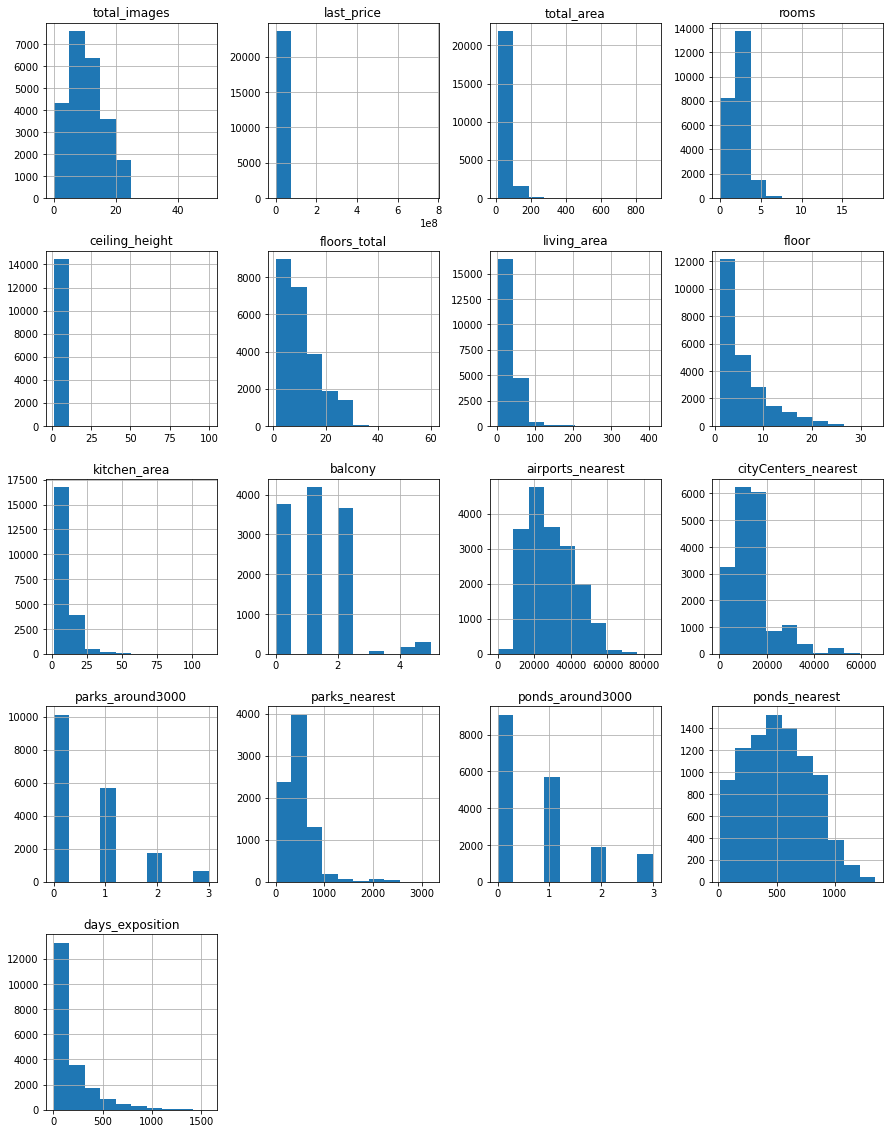

In [6]:
#построим гистограммы для всех столбцов
data.hist(figsize=(15, 20))
plt.show();

**Выводы**

В каждой строке таблицы - данные о продаже квартиры. Часть колонок описывает объявление о продаже: количество фото в объявлении, цену, данные по квартире, этаж и количество этажей, название города или населённого пункта. Остальные данные являются картографическими: расстояние до ближайшего аэропорта, парка, водоёма, расстояние до центра города, сколько висело объявление, количество парков и водоёмов в пределах трёх километров.

Мы видим, что в таблице присутствуют пропуски, а некоторым столбцам установлен не тот тип данных. По первичным гистограммам сложно сделать чёткие выводы. 

Приступим к предобработке данных.

## Предобработка данных

### Найти и изучить пропущенные значения в столбцах

In [7]:
#выведем количество пропущенных значений для каждого столбца
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Поясним, какие значения пропущены и как их можно обработать:

* **ceiling_height** - высоту потолка можно заполнить медианными значениями
* **floors_total** - оставим NaN, т.к. мы никак не можем вычислить количество этажей в доме
* **living_area** - жилую площадь заполним коэффициентом от общей площади
* **is_apartment** - заполним значениями False, т.к. часть продавцов могла пропускать эту графу, если у них не апартаменты
* **kitchen_area** - площадь кухни заполним коэффициентом от общей площади
* **balcony** - заполним значением 0, т.к., если продавец не указал число балконов, то, скорее всего, в его квартире их нет
* **locality_name** - оставим NaN, т.к. мы никак не можем вычислить местоположение объекта
* **airports_nearest** - оставим NaN, т.к. мы никак не можем узнать расстояние до ближайшего аэропорта
* **cityCenters_nearest** - оставим NaN, т.к. мы никак не можем узнать расстояние до центра города
* **parks_around3000** - оставим NaN, т.к. мы никак не можем узнать число парков в радиусе 3х километров
* **parks_nearest** - оставим NaN, т.к. мы никак не можем узнать расстояние до ближайшего парка
* **ponds_around3000** - оставим NaN, т.к. мы никак не можем узнать число водоёмов в радиусе 3х километров
* **ponds_nearest** - оставим NaN, т.к. мы никак не можем узнать расстояние до ближайшего парка
* **days_exposition** - оставим NaN, т.к. мы никак не можем вычислить сколько дней висело объявление

Пропуски в столбцах, взятых из объявлений о продаже, выглядят так, что продавец забыл или умышленно не указал информацию. 
А вот пропуски в столбцах, полученных по картографическим данным, больше похожи на технические неполадки при выгрузке.


In [8]:
#рассчитаем медиану высоты потолка и заменим NaN значения
median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(median)

In [9]:
#расчёт жилой площади по отношению к общей площади (будем считать, что жилая площадь занимает 60% от общей)
coefficient = data['total_area'] * 0.6
data['living_area'] = data['living_area'].fillna(coefficient)

In [10]:
#заполним значениями False
data['is_apartment'] = data['is_apartment'].fillna(False)

In [11]:
#расчёт площади кухни по отношению к общей площади (будем считать, что площадь кухни занимает 15% от общей)
coefficient = data['total_area'] * 0.15
data['kitchen_area'] = data['kitchen_area'].fillna(coefficient)

In [12]:
#вместо NaN балконов подставим 0
data['balcony'] = data['balcony'].fillna(0)

In [13]:
#проверим, что пропуски убрали
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Изменение типов данных

Столбцы, в которых можно изменить тип данных:

* **first_day_exposition** - поскольку здесь записана дата, то переведём значения в datetime
* **is_apartment** - переведём в логический тип, поскольку продавец указывает, является ли продаваемое помещение                                апартаментами или нет
* **balcony** - количество балконов может быть только чётным, значит переведём в целочисленный тип
* **last_price** - переведём в целочисленный, ибо, судя по данным, значения указаны целым число 

In [14]:
#изменим тип столбца first_day_exposition с object на datetime
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [15]:
#изменим тип столбцов в целочисленный
data['balcony'] = data['balcony'].astype('int')
data['last_price'] = data['last_price'].astype('int')


In [16]:
#изменим тип столбца is_apartment на boll
data['is_apartment'] = data['is_apartment'].astype('bool')

### Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты

In [17]:
#просмотрим все уникальные значения
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [18]:
import re    #подключаем библиотеку регулярных выражений
x = str()    #временная переменная для сохранения строки в новом формате
duplicates = data['locality_name'].unique()
for dup in duplicates:
    if not isinstance(dup, str):    #проверка, что dup, является строкой (чтобы не было ошибки из-за nan значений) 
        continue                    #если dup не строка, то пропускаем
    result = re.search(r'[А-Я]+.+', dup).group(0)   #выбираем из строки название. group(0) - выбирает первое вхождение
    if 'поселок' in dup or 'посёлок' in dup:
        x = f'посёлок {result}' 
    elif 'деревня' in dup: 
        x = f'деревня {result}'
    elif 'село' in dup:
        x = f'село {result}'
    elif 'сад' in dup:
        x = f'садоводческое товарищество {result}'
    else:
        x = result
    data['locality_name'] = data['locality_name'].replace(dup, x)
  

In [19]:
#проверим наш результат
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'посёлок Металлострой', 'посёлок Лебяжье', 'посёлок Сиверский',
       'посёлок Молодцово', 'посёлок Кузьмоловский',
       'садоводческое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок Ефимовский', 'посёлок Плодовое', 'деревня Заклинье',
       'посёлок Торковичи', 'посёлок Первомайское', 'Красное Село',
       'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', '

Мы избавились от неявных дубликатов объединив названия населённых пунктов в группы.

### Найдём и устраним редкие и аномальные значения

In [20]:
#проверим уникальные значения
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

Видим, что есть выбивающиеся значение от 20м и больше, предположим, что на самом деле это значение 2.0м и т.д.
Также видим, что есть значения меньше 2м, эти значения не можем обработать, поэтому их удалим.
Ещё присутствуют большие значения выше 6м, их трогать не будем, вдруг это квартиры с перепланировкой или частные дома/коттеджи.

In [21]:
#создадим функцию для проверки аномальных значений
def ceiling_anomaly(cl):
    if cl > 12:
        return cl/10
    else:
        return cl
    
data['ceiling_height'] = data['ceiling_height'].apply(ceiling_anomaly)

In [22]:
#создадим два списка чтобы заменить большие выбивающиеся значения на нормальные
#anomaly = [25, 32, 27, 24, 26, 14, 20, 22.6, 27.5, 100]
#no_anomaly = [2.5, 3.2, 2.7, 2.4, 2.6, 1.4, 2.0, 2.26, 2.75, 10]
#data['ceiling_height'] = data['ceiling_height'].replace(anomaly, no_anomaly)

#удалим слишком маленькие значения для высоты потолка
data = data.loc[data['ceiling_height'] >= 2]

#проверим результат
data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        8.3 ,  2.98,

Проверим выбросы в других столбцах

In [23]:
#оценим данные в таблице методом describe
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23695.000000,2.369500e+04,23695.000000,23695.000000,23695.000000,23609.000000,23695.000000,23695.000000,23695.000000,23695.000000,18154.000000,18177.000000,18178.000000,8078.000000,18178.000000,9108.000000,20514.000000
mean,9.858240,6.541927e+06,60.350643,2.070690,2.698419,10.672879,34.742865,5.892593,10.369914,0.591095,28794.761871,14190.964406,0.611398,490.829042,0.770107,518.054128,180.892366
std,5.682383,1.088787e+07,35.656639,1.078473,0.241826,6.595224,22.495584,4.885546,5.959332,0.959312,12631.237778,8608.970586,0.802048,342.332109,0.938216,277.702840,219.742450
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13095.000000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,11.800000,1.000000,37274.500000,16293.000000,1.000000,612.000000,1.000000,729.250000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,10.300000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Мы видим, что есть очень большие значения в следующих столбцах:
- цена
- общая площадь 
- расстояние до ближайшего аэропорта
- расстояние до центра города

Построим для них диаграммы размаха

<AxesSubplot:>

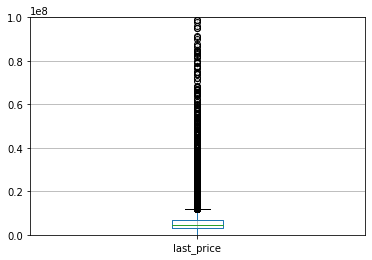

In [24]:
#создадим диаграмму размаха по цене 
plt.ylim(-10, 100000000)
data.boxplot(column='last_price')

In [25]:
#поставим ограничение в 40млн, чтобы немного укоротить хвост выбросов 
data = data.loc[data['last_price'] < 40000000]

In [26]:
#поставим ограничение, чтобы цена начиналась от 100 000, чтобы убрать аномально низкие цены
data = data.loc[data['last_price'] > 100000]

<AxesSubplot:>

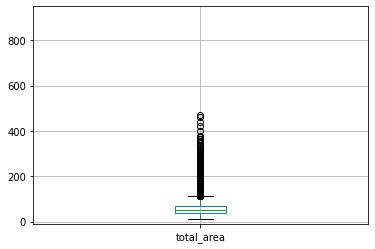

In [27]:
#создадим диаграмму размаха для общей площади
plt.ylim(-10, 950)
data.boxplot(column='total_area')

Здесь можно было бы обрезать значения, но не будем этого делать, поскольку хвост не очень большой, да и такие значения могут существовать.

<AxesSubplot:>

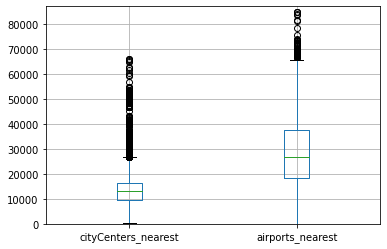

In [28]:
#создадим диаграмму размаха для расстояния до центра города и ближайшего аэропорта
plt.ylim(-10, 87000)
data.boxplot(column=['cityCenters_nearest', 'airports_nearest'])

Не будем удалять значения, поскольку хвост не очень большой

In [28]:
#проверим наличие явных дубликатов в таблице
data.duplicated().sum()

0

Никаких явных дубликатов в данных не обнаружено.

**Выводы**

Предобработка обнаружила следующие проблемы в данных:
- пропущенные значение
- неправильный тип данных
- неявные дубликаты
- редкие и аномальные значения

Блягодаря обработке пропущенных значений получится провести более точное исследование, но возможно, что в ходе исследования обнаружатся интересеные детали в столбцах, которые на данный момент нельзя никак заполнить значениями, тогда мы вернёмся к этим столбцам, чтобы обработать их.

Изменение типа данных поможет нам провести более точные расчёты.

Без дубликатов исследование станет более точным.

Редкие и аномальные значения могут исказить графики в исследовании, поэтому можно убрать их, если сочтём это нужным.

## Посчитайте и добавьте в таблицу новые столбцы

In [31]:
#добавим в таблицу столбец с ценой одного квадратного метра
data['price_meter'] = (data['last_price'] / data['total_area']).round(2)

#добавим в таблицу столбец со днём публикации объявления
data['day'] = data['first_day_exposition'].dt.weekday

#добавим в таблицу столбец с месяцем публикации объявления
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

#добавим в таблицу столбец с годом публикации объявления
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

#добавим в таблицу столбец с расстоянием в км до центра города и округлим до целого
data['cityCentres_km'] = (data['cityCenters_nearest'] / 1000).round(0)


In [30]:
#добавим в таблицу столбец с типом этажа квартиры
def apartment_floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 1
    if floor == floors_total:
        return 3 #последний
    return 2 #другой

data['floor_type'] = data.apply(apartment_floor_type, axis=1)

In [31]:
#проверим наши новые столбцы
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day,month,year,cityCentres_km,floor_type
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,16.0,2
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,19.0,1
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,14.0,2
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,8.0,2
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,NaN,2


**Выводы**

Мы добавили в таблицу новые столбцы. Они помогут нам провести исследование более точно.

## Проведите исследовательский анализ данных

### Построим отдельные гистограммы для некоторых столбцов

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

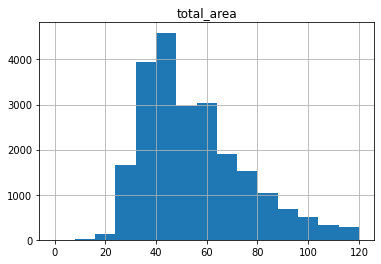

In [32]:
data.hist('total_area', bins=15, range=(0, 120))

Мы видим, что есть малое количество квартир с общей площадью до 25 квадратных метров, это могут быть уменьшенные однушки или студии. Больше всего квартир имеют площадь от 30 до 72 квадратных метров, а потом начинается резкий спад, поскольку значения 30-72, являются типичными для квартир с 1-3 комнат. Есть и очень большие значения под 300 и больше квадратных метров, ибо человек может продавать коттедж или частный дом.

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

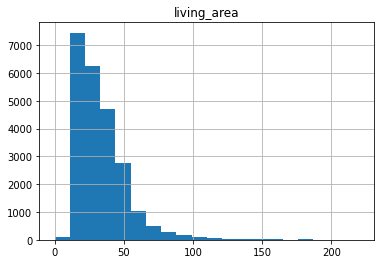

In [33]:
data.hist('living_area', bins=20, range=(0, 220))

По гистограмме можно сказать, что больше всего продаётся квратир с жилой площадью от 10 до 40 кв.м.. Значения до 10 кв.м. отлично подходят для студий. Значения от 120 кв.м. могут быть выбросами, но трогать мы их не будем, ибо они имеют место быть.

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

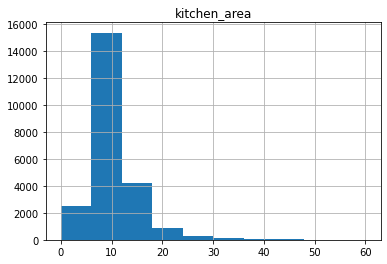

In [34]:
data.hist('kitchen_area', bins=10, range=(0, 60))

Есть число кухонь до 7 кв.м., что вполне нормально. Больше всего квартир с кухней от 8 до 11 кв.м.. В некоторых помещениях кухни доходят до 50 кв.м., что можеть быть аномальным значением, поскольку это много даже для коттеджа/частного дома

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

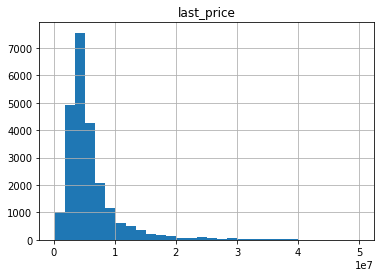

In [35]:
data.hist('last_price', bins=30, range=(100000, 50000000))

Больше всего квартир со стоимостью от 2х до 5 миллионов, дальше начинается спад. Очень похоже на распределение Пуассона, которое стремится к нормальному. Есть небольшое количество с ценой до 40 млн., что имеет место быть.

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

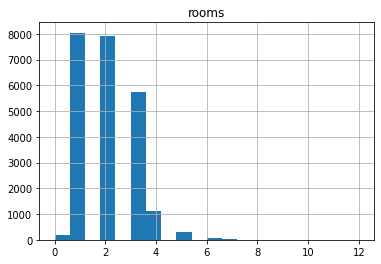

In [36]:
data.hist('rooms', bins=20, range=(0, 12))

Больше всего квартир с количеством комнат от 1 до 3. Есть квартиры с 0 комнат, но это, скорее всего, студии. Видим ещё значения до 7 комнат, что тоже имеет место быть в частном доме/коттедже/квартире с перепланировкой.

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

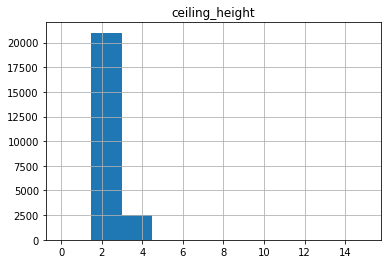

In [37]:
data.hist('ceiling_height', bins=10, range=(0, 15))

Высота потолка, почти везде, имеет высоту 2.65 м.. Значения до 5 метров подходят для частных домов/коттеджей.

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

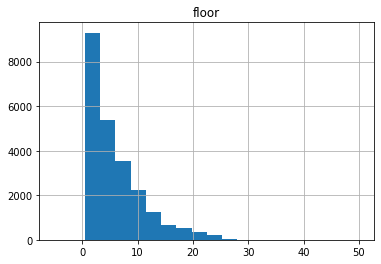

In [38]:
data.hist('floor', bins=20, range=(-5, 50))

Большинство квартир находятся на 1-3 этаже. Спад от 9 этажей вполне очевиден, ибо раньше строили девятиэтажки и пятиэтажки, а значения выше характерны для новостроек, а их пока меньше, нежели старых домов.

array([[<AxesSubplot:title={'center':'floor_type'}>]], dtype=object)

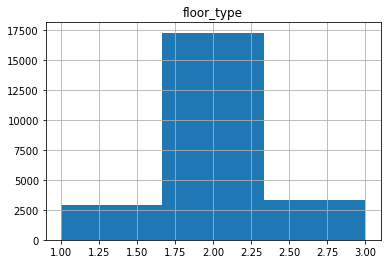

In [39]:
data.hist('floor_type', bins=3)

Можем смело утверждать, что количество продаваемых квартир на первом и последнем этаже, примерно, одинаково.

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

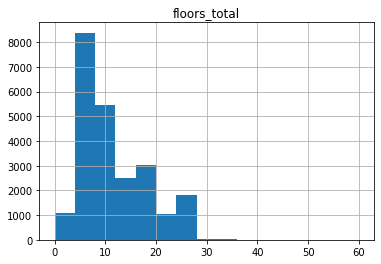

In [40]:
data.hist('floors_total', bins=15, range=(0, 60))

Больше всего продаётся квартир в домах, где количество этажей от 5 до 9. От 10 уже, в основном, идут новостройки. Значения до 5 подходят для старых домов, коттеджей/частных домов, посёлков, где встречаются и 3х этажные, и 4х этажные дома.

array([[<AxesSubplot:title={'center':'cityCentres_km'}>]], dtype=object)

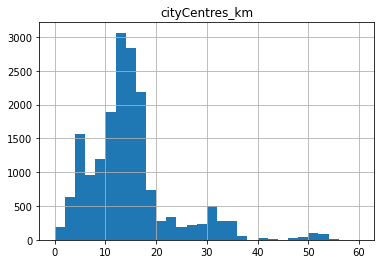

In [41]:
data.hist('cityCentres_km', bins=30, range=(0, 60))

Большинство квартир расположены от 10 до 18 км. от центра города, что хорошо соотносится с тем, что большая часть квартир находится в спальных районах. Прям рядом с центром продаётся не так много квартир. Значения от 25 км. тоже имеют место быть. Видим небольшой всплеск от 40 до 60 км.. Предположим, что это значения для посёлков и деревень недалеко от города.

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

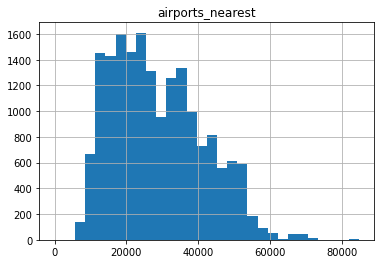

In [42]:
data.hist('airports_nearest', bins=30)

Большинство значений находится в диапазоне от 10 до 38 км. от аэропорта, с поледующим снижением. Рядом с аэропортом могут продаваться квартиры и дома, но их настолько мало, что это даже не заметно на гистограмме. Видим большие и редкие значения от 52 км., это могут быть деревни и посёлки.

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

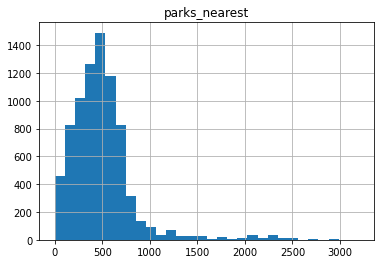

In [43]:
data.hist('parks_nearest', bins=30, range=(0, 3200))

Видим, что большинство парков расположены в пределах 1 км. от жилплощади. 

<AxesSubplot:ylabel='Frequency'>

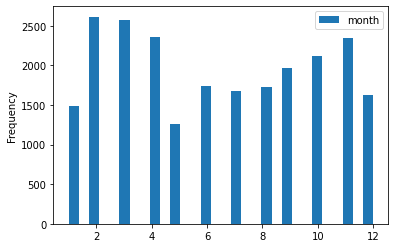

In [44]:
data.plot(x='day', y='month', kind='hist', bins=30)

Большинство квартир покупали с февраля по апрель, а потом заметен резкий спад с последующим увличением. Меньше всего покупали в январе, мае и декабре.

### Изучим, как быстро продавались квартиры

Среднее: 179.83754051664866
Медиана: 95.0


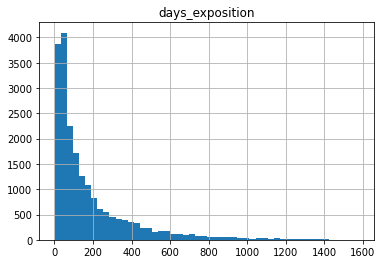

In [45]:
#построим гистограмму и посчитаем среднее, и медиану
data.hist('days_exposition', bins=50)
print('Среднее:', data['days_exposition'].mean())
print('Медиана:', data['days_exposition'].median())

Мы видим, что весомая часть квартир была продана в пределах 50 дней. Также есть объявления, которые висели больше 3х и 4х лет, но таких значений не очень много. Среднее и медиана прилично отличаются друг от друга. Но нужно понимать, что на среднее сильно повлияли объявления, которые висели больше 2х лет. 

Предположим, что квартиры могли продаваться больше 2х лет по следующим причинам: 1) продавец забыл снять объявление о продаже; 2) слишком завышенная стоимость; 3) плохое состояние квартиры; 4) продажа квартиры в каком-нибудь отдалённом и малонаселённом наслённом пункте. 

Построим ещё одну гистограмму, но выберем только те объявления, которые висели в пределах одного года. Благодаря срезу ещё и подробнее рассмотрим значения близкие к 0, чтобы сделать по ним более точный вывод.

Среднее: 104.50991011753861
Медиана: 74.0


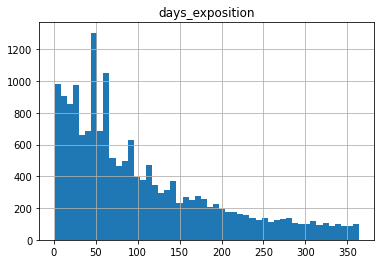

In [46]:
#сделаем срез и построим гистограмму
data.query('days_exposition < 365').hist('days_exposition', bins=50)
print('Среднее:', data[data['days_exposition'] < 365]['days_exposition'].mean())
print('Медиана:', data[data['days_exposition'] < 365]['days_exposition'].median())

Благодаря срезу мы видим, что 1000 квартир были куплены очень быстро, буквально за 10 дней. Предположим, что такие покупки были совершены по следующим причинам: 1) продавец выставил цену ниже средней по рынку; 2) удобное расположение; 3) квартира находится в большом населённом пункте.

Есть два небольших пика в 50 и 70 дней, что выглядит вполне естественно, ибо медиана находится близко к этим значениям. 

По гистограмме видно, что, чаще всего, объявление висит около 70 дней, а потом начинается постепенный спад. 

<AxesSubplot:>

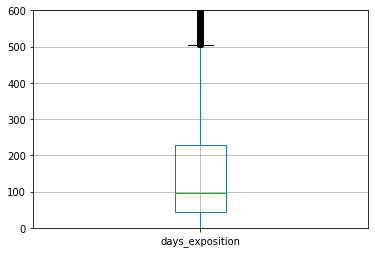

In [47]:
plt.ylim(0, 600)
data.boxplot(column='days_exposition')

Быстрые продажи - будем считать, что это продажи, которые не доходят до медианного значения. Объявления, которые висели меньше 100 дней.

Необычно долгие продажи - будем считать, что эти продажи лежат за межквартильным размахом. То бишь, объявления, которые больше 500 дней висели на платформе.

### Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта

In [48]:
#построим общий график зависимости цены от общей площади, жилой площади и площади кухни
#(data
# .query('last_price < 6500000') #поскольку значений слишком много, то зададим срез в средние 6.5млн.
# .pivot_table(index='last_price', values=['total_area', 'living_area', 'kitchen_area'], aggfunc='median')
# .plot(grid=True, figsize=(12, 5)))

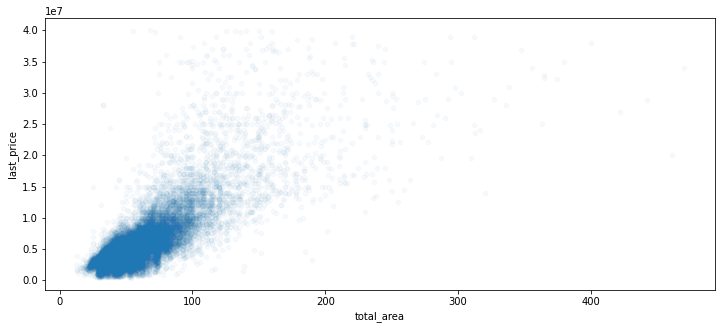

Коэффициент корреляции: 0.7864873611762675


In [49]:
#построим общий график зависимости цены от общей площади
data.plot(x='total_area', y='last_price', figsize=(12, 5), kind='scatter', alpha=0.03)
plt.show()
print('Коэффициент корреляции:',data['last_price'].corr(data['total_area']))

На графике видно следующее:

- сделав график более прозрачным, мы увидели область данных с самой высокой частотой
- в самой плотной зоне общая площадь от 30 до 75 кв.м. и ценой от 2.5 до 6.5 млн..
- по коэффициенту корреляции можно сказать, что цена довольно сильно зависит от общей площади


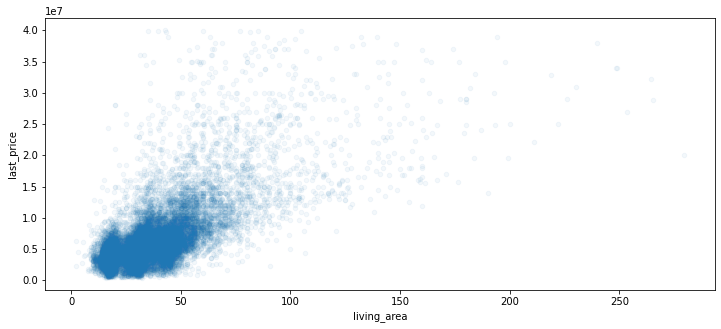

Коэффициент корреляции: 0.6994263649323115


In [50]:
#построим общий график зависимости цены от площади жилых помещений
(data.plot(x='living_area', y='last_price', figsize=(12, 5), kind='scatter', alpha=0.05))
plt.show()
print('Коэффициент корреляции:',data['last_price'].corr(data['living_area']))

На графике видно следующее:

- видна область данных с самой высокой частотой
- в самой плотной зоне площадь жилых помещений от 20 до 45 кв.м. и ценой от 2.5 до 6.5 млн..
- по коэффициенту корреляции можно сказать, что площадь жилых помещений имеет сильное влияние на общую цену

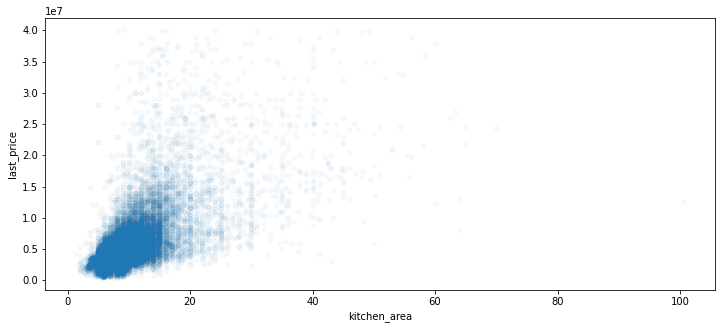

Коэффициент корреляции: 0.6187013722182296


In [51]:
#построим общий график зависимости цены от площади кухни
(data.plot(x='kitchen_area', y='last_price', figsize=(12, 5), kind='scatter', alpha=0.03))
plt.show()
print('Коэффициент корреляции:',data['last_price'].corr(data['kitchen_area']))

На графике видно следующее:

- видна область данных с самой высокой частотой
- в самой плотной зоне площадь кухни от 6 до 13 кв.м. и ценой от 2.5 до 6.5 млн..
- корреляция в 0.62 говорит о наличии связи, но не такой существенной

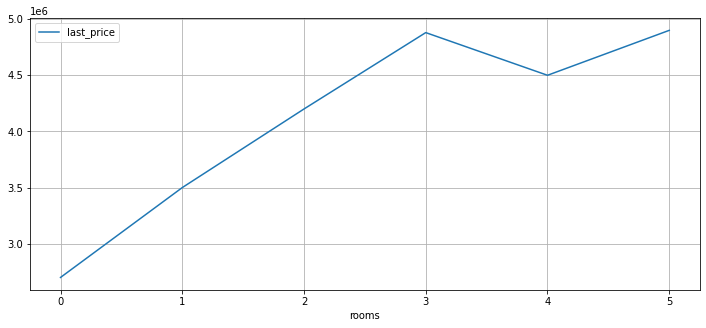

In [52]:
#построим график зависимости цены от количества комнат
(data
 .query('rooms <= 5 and last_price < 6500000') #ограничим цену и комнаты
 .pivot_table(index='rooms', values='last_price', aggfunc='median')
 .plot(grid=True, figsize=(12, 5)))
plt.show()

График показывает, что количество комнат прямо влияет на стоимость. Есть спад на значениях в 4 комнаты, но он не большой и его можно рассматривать как погрешность в данных. Ещё можно предположить, что объявлений, где указано 4 комнаты, меньше нежели остальных.

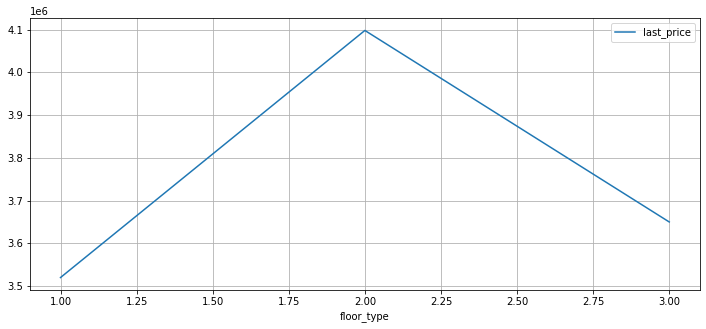

In [53]:
#построим график зависимости цены от типа этажа
(data
 .query('last_price < 6500000') #ограничим цену по среднему значению
 .pivot_table(index='floor_type', values='last_price', aggfunc='median')
 .plot(grid=True, figsize=(12, 5)))
plt.show()

Видим, что квартиры, расположенные на первом и последнем этаже, стоят дешевле, нежели квартиры на других этажах. На последнем этаже квартиры стоят немного больше, чем на первом.

С 14 по конец 15 года довольно много скачков, возможно, в это время продавали очень большие и дорогие квартиры/дома. Ещё можно предположить, что цена так сильно скакала с 14 по 15 год из-за валютного кризиса в стране. С конца 15 года можно заметить, что в среднем цена стабилизировалась и колеблется от 4 до 6 млн.. 

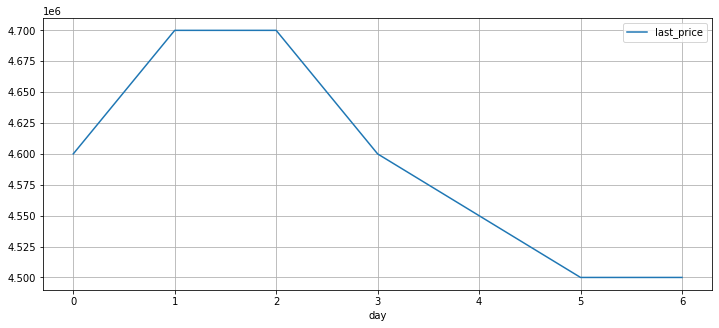

In [55]:
#построим график зависимости цены от даты размещения 
(data
 .pivot_table(index='day', values='last_price', aggfunc='median')
 .plot(grid=True, figsize=(12, 5)))
plt.show()

По графику можно сделать вывод, что объявления, которые выкладывались в начале недели, имели самую высокую стоимость. А вот в выходные стоимость была меньше.

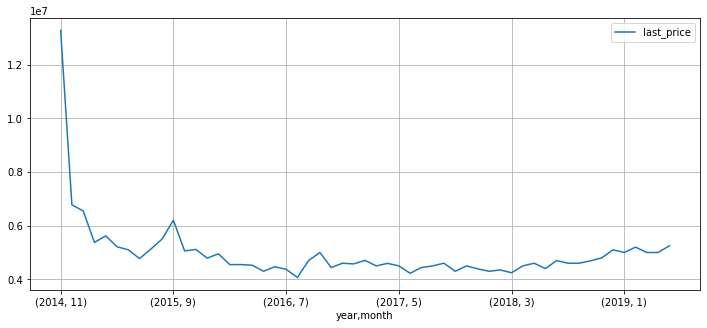

In [56]:
#построим график зависимости цены от месяца размещения 
(data
 .pivot_table(index=['year', 'month'], values='last_price', aggfunc='median')
 .plot(grid=True, figsize=(12, 5)))
plt.show()

Как мы можем видеть на графике, в конце 2014 года объявление о продаже имели довольно высокую стоимость, после чего последовал резкий спад. Есть лишь два небольших скачка: один в сентябре 2015, а дугой в сентябре 2016. В остальное же время цена особо сильно не менялась. С марта 2018 года заметно очень медленное увеличение стоимости квартир.

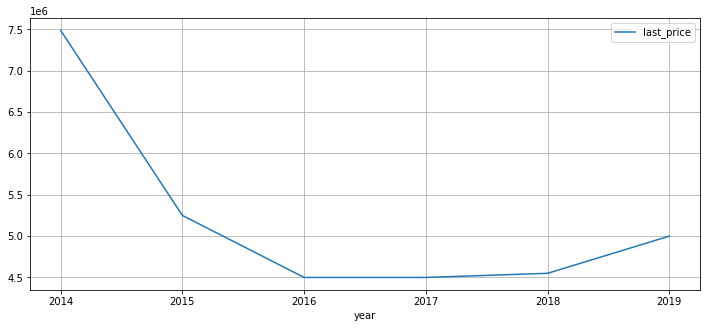

In [57]:
#построим график зависимости цены от года
(data
 .pivot_table(index='year', values='last_price', aggfunc='median')
 .plot(grid=True, figsize=(12, 5)))
plt.show()

Можно сказать, что это просто более плавный график предыдущего. Мы видим, что с 14 по 16 год цена довольно резко снижалась, что могло быть связано с валютным кризисом в стране. В 16 году цена стабилизировалась и особо не менялась. С 18 года цена начала расти.

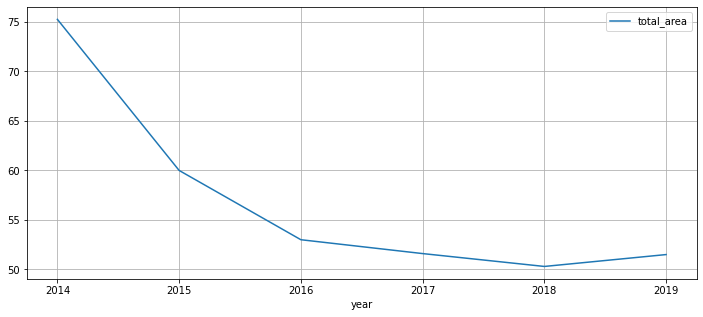

In [58]:
#построим график зависимости площади продаваемых квартир от года
(data
 .pivot_table(index='year', values='total_area', aggfunc='median')
 .plot(grid=True, figsize=(12, 5)))
plt.show()

А вот теперь стало интересно, ибо на графике выше мы считали, что цена сильно падала с 14 по 16 год, а после стабилизировалась и сильно не менялась с течением времени. Теперь же мы видим, что цена снизилась из-за того, что сильно упала площадь продаваемых квартир.

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [59]:
#создадим сводную таблицу по значениям цены за метр в населённых пунктах
ln_pm = (data
         .pivot_table(index='locality_name', values='price_meter', aggfunc='median')
         .sort_values('price_meter', ascending=False).round(2))

#создадим сводную таблицу по количеству объявлений в населённых пунктах
ln_de = (data       
 .pivot_table(index='locality_name', values='days_exposition', aggfunc='count')
 .sort_values('days_exposition', ascending=False))

In [60]:
#используем метод join, ибо индексы у таблиц одинаковые. 
ln_de.join(ln_pm).head(10)

,days_exposition,price_meter
locality_name,,
Санкт-Петербург,13484,104411.76
посёлок Мурино,551,85878.46
посёлок Шушары,408,76876.18
Всеволожск,339,65789.47
Колпино,308,74723.74
Пушкин,306,99993.59
посёлок Парголово,302,91642.86
деревня Кудрово,299,91860.47
Гатчина,268,67796.61


По полученной таблице можно сделать следующие выводы:

- Больше всего объявлений в Санкт-Петербурге 
- Самая большая цена за кв.м. тоже в Санкт-Петербурге
- Можно предположить, что всё населённые пункты с большим числом объявлений, это ближайшие к Санкт-Петербургу города, деревни и посёлки
- Чем дальше от Санкт-Петербурга, тем дешевле становится цена одного квадратного метра в квартире

In [61]:
#выведем таблицы с самой низкой и высокой ценой за квадратный метр
display(ln_pm.join(ln_de).head(10))
ln_pm.join(ln_de).tail(10)

,price_meter,days_exposition
locality_name,,
Санкт-Петербург,104411.76,13484
Зеленогорск,101666.66,21
Кудрово,100000.00,142
Пушкин,99993.59,306
Сестрорецк,99678.46,163
посёлок Левашово,96997.69,1
деревня Кудрово,91860.47,299
посёлок Парголово,91642.86,302
Мурино,91478.39,0


,price_meter,days_exposition
locality_name,,
посёлок Житково,14956.28,2
деревня Ям-Тесово,13711.56,2
деревня Сижно,13709.68,0
посёлок Тёсово-4,12931.03,1
деревня Малая Романовка,12724.55,1
посёлок Совхозный,12629.13,2
деревня Выскатка,12335.48,2
деревня Вахнова Кара,11688.31,1
посёлок Свирь,11481.48,2


Подтверждается, что в Питере самая высокая цена за метр. Следует учесть, что в населённых пунктах, где мало объявлений, все квартиры там могут находиться рядом с центром и иметь большую площадь. Эти нюансы могут относиться ко всем значениям, где мало объявлений, но высокая цена за метр. Плюс эти населённые пункты могут быть рядом с Санк-Петербургом. 

Во второй таблице мы видим, что цена за метр очень сильно отличается от таблицы выше. Как уже раньше говорилось, эти населённые пункты могут находиться далеко от областного центра, что существенно влияет на стоимость.

### Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра

In [62]:
ln = (data
 .query('locality_name == "Санкт-Петербург"')
 .groupby(['locality_name', 'cityCentres_km'])['last_price']
 .mean())
ln

locality_name    cityCentres_km
Санкт-Петербург  0.0               1.659288e+07
                 1.0               1.253150e+07
                 2.0               1.169288e+07
                 3.0               1.003295e+07
                 4.0               1.089501e+07
                 5.0               1.148993e+07
                 6.0               1.087462e+07
                 7.0               1.066356e+07
                 8.0               9.045121e+06
                 9.0               6.962379e+06
                 10.0              6.457468e+06
                 11.0              6.138146e+06
                 12.0              5.828545e+06
                 13.0              6.083141e+06
                 14.0              5.628834e+06
                 15.0              5.884751e+06
                 16.0              5.373131e+06
                 17.0              5.241741e+06
                 18.0              5.091331e+06
                 19.0              5.037675e+06
        

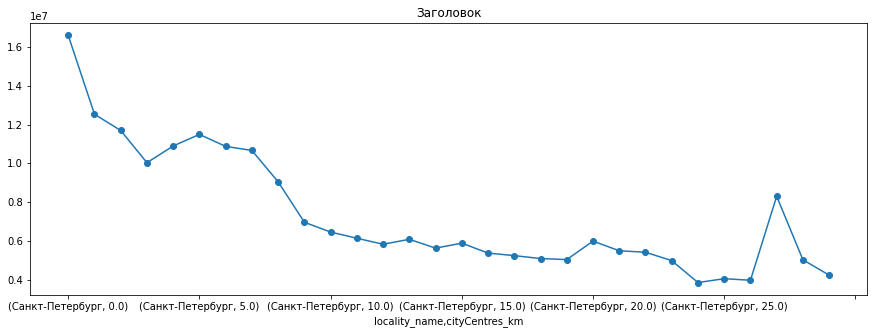

In [65]:
#построим линейную диаграмму для визуализации динамики цены относительно удалённости
ln.plot(style='o-', figsize=(15, 5), title = 'Заголовок')
plt.show()

**Вывод**

По полученной таблице и графику видим, что расстояние до центра прямо влияет на стоимость жилья. В первые три километра от центра заметно, что цена сильно снижается. От 3 до 5 км. значения начинают расти. С 5 до 7 небольшой спад в цене. С 7 до 9 км. идёт очень резкий спад в цене на несколько млн.. С 9 до 19 км. заметен постепенный спад в цене с небольшими колебаниями вверх. С 19 км. цены резко возрастают, но сразу же идёт спад. На 27 виден резкий скачок в цене, характерный для расстояния в 8 км. от центра. 

Можно сделать вывод, что цена в первые 9 километров от центра имеет довольно сильные колебания. Дальше расстояние уже не так сильно влияет на цену. Есть сильный скачок в цене на 27 км., но можно предположить, что это продавались квартиры с большой площадью. 

## Общий вывод

В ходе исследования мы изучили данные сервиса Яндекс.Недвижимость, а именно архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. После изучения общей информации мы приступили к предобработке.

На этапе предобработки мы проделали следующее: 
* избавились от пропусков там, где это было возможно
* изменили тип данных на нужный
* изучили уникальные значения 
* устранили аномалии и редкие значения

Во время работы с данными мы выявили следующие интересные особенности и зависимости:
- больше всего квартир с площадью от 30 до 72 кв.м.
- большинство квартир имеют от 1 до 3 комнат
- больше всего квартир находится в диапазоне с 1 по 9 этаж
- цена за квартиру на первом и последнем этаже, меньше чем на остальных
- размер кухни не так сильно влияет на стоимость квартиры
- с 2014 по 2016 было падение цены за квартиры, но мы провели исследование и заметили, что упала не столько цена, сколько площадь продаваемых квартир, из-за чего сократилась и стоимость
- если объявление о продаже висит больше 70 дней, то шанс продажи становится меньше
- в Санкт-Петербурге и его окрестностях самая высокая цена за квадратный метр. Чем дальше от Питера, тем дешевле
- хоть расстояние до центра Санкт-Петербурга и влияет на стоимость жилья, но в большинстве значениях цена колеблется ± в одном диапазоне. В первые 9 километров от центра цена имеет самый сильный разброс по значениям.